# Importing Libraries usefull in project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading our data

In [10]:
df = pd.read_csv("auto-mpg.csv")

# Display top 5 rows of data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
# Display top 5 rows of data

df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [11]:
# Finding the no. or rows and columns

df.shape

(398, 9)

In [12]:
# Name of columns

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [13]:
#  Finding the types of each column

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [15]:
# getting info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [16]:
# Getting statistical inof of data

df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
# Finding null values

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

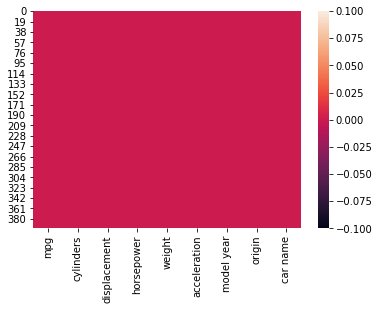

In [18]:
# Finding null values graphically

sns.heatmap(df.isnull())

so there are no null values present in data

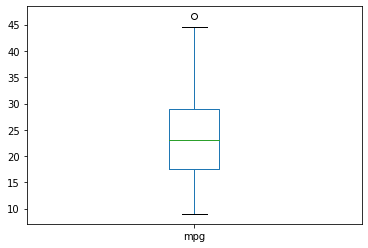

In [30]:
df['mpg'].plot.box()

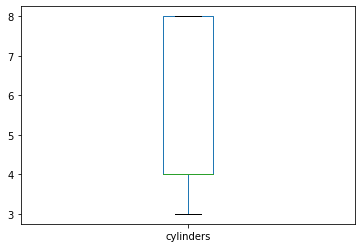

In [32]:
df['cylinders'].plot.box()

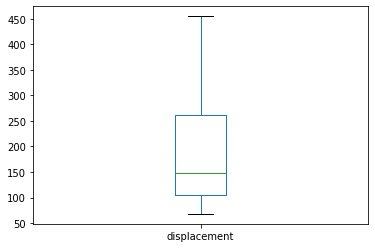

In [33]:
df['displacement'].plot.box()

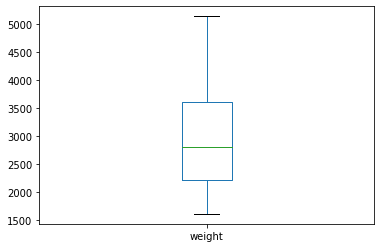

In [34]:
df['weight'].plot.box()

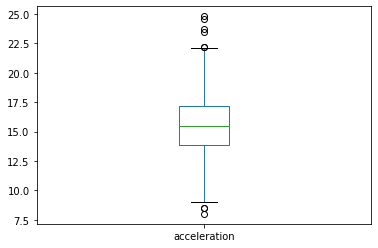

In [35]:
df['acceleration'].plot.box()

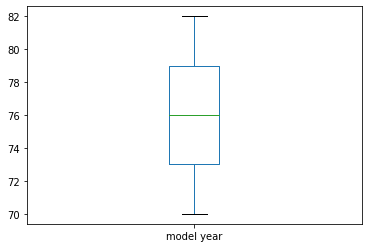

In [36]:
df['model year'].plot.box()

There are hardly any outliers present in the data

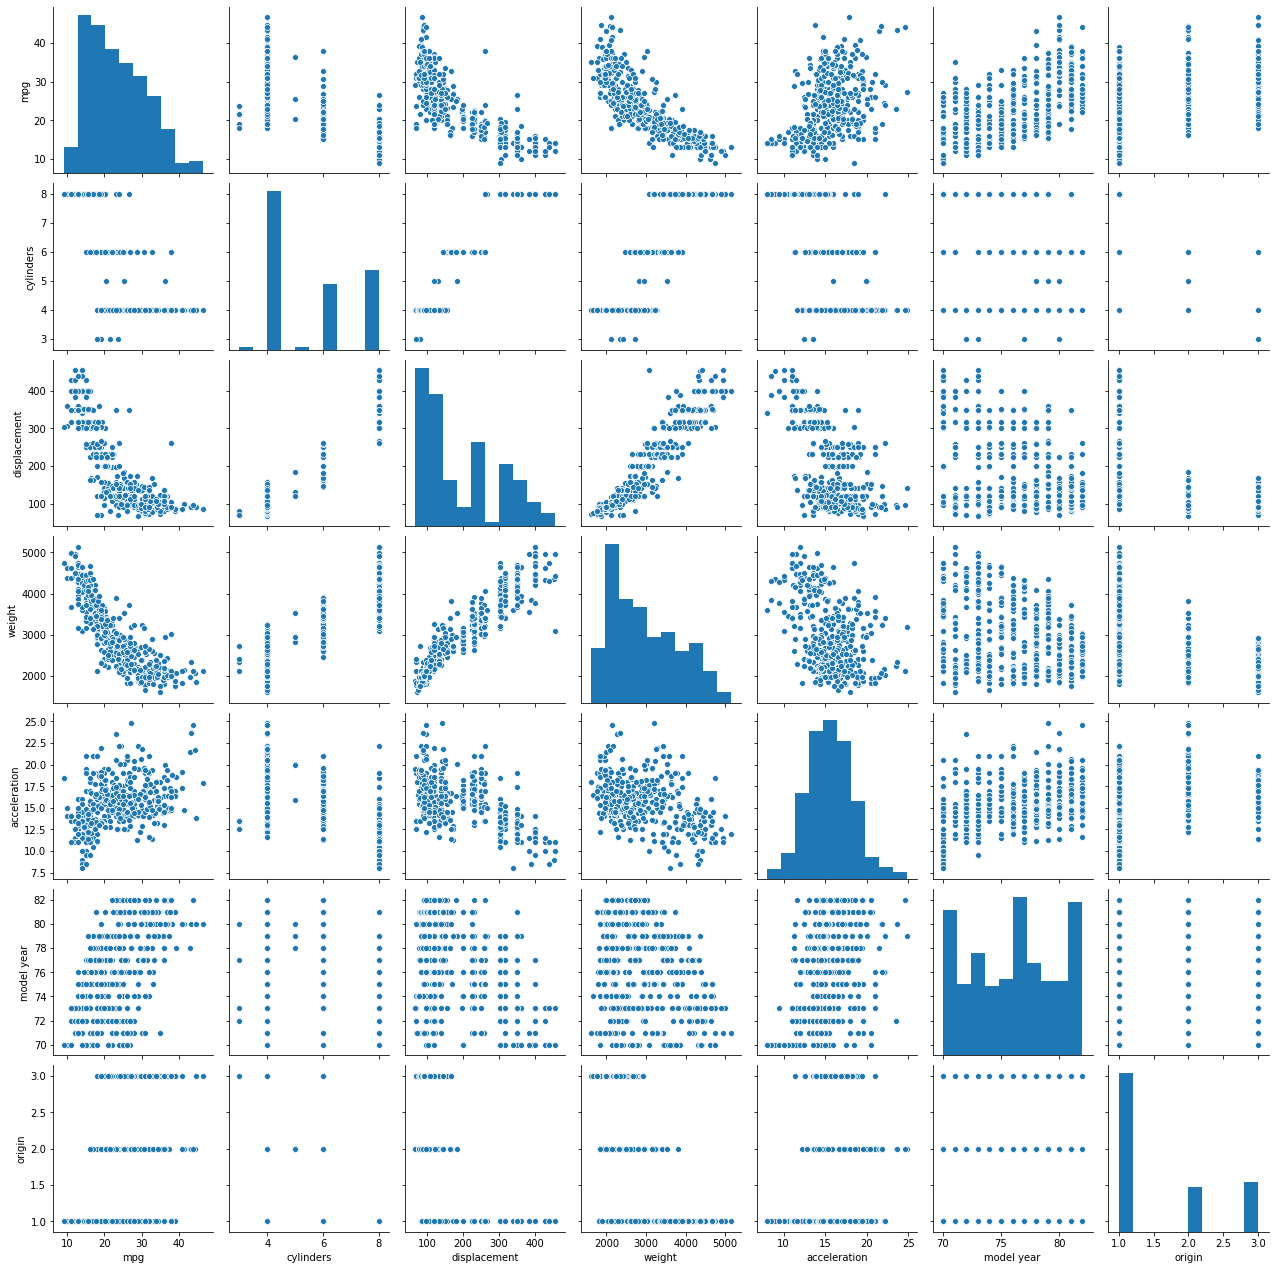

In [41]:
# Lets see the pair wise graph of data

sns.pairplot(df)

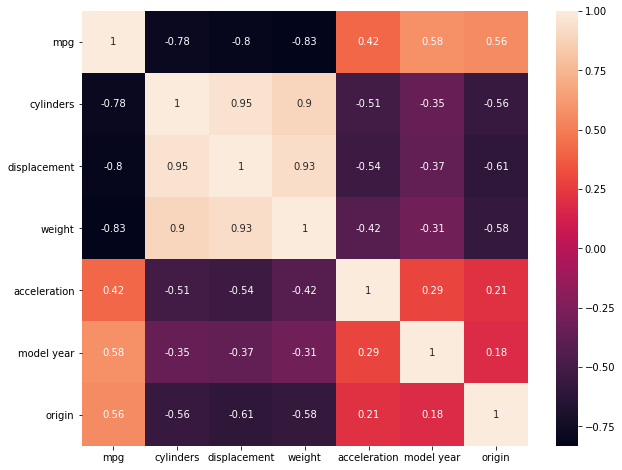

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

From this heatmap we got to know that attributes like cylinders, displacment and weight are highly positicve correlated with each other while negatively correlated with acceleration, model year and origin.

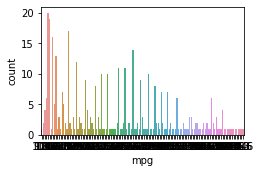

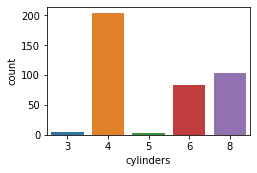

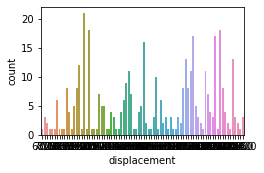

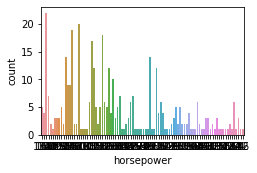

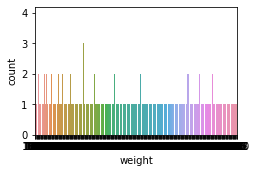

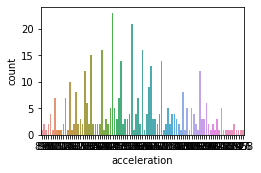

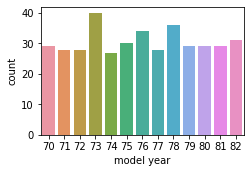

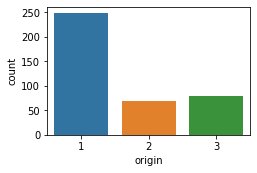

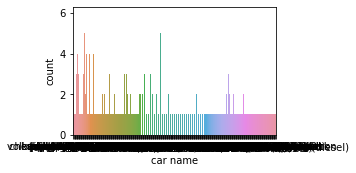

In [47]:
for i in df:
    plt.figure(figsize=(8,8))
    plt.subplot(325)
    sns.countplot(df[i])

KeyboardInterrupt: 

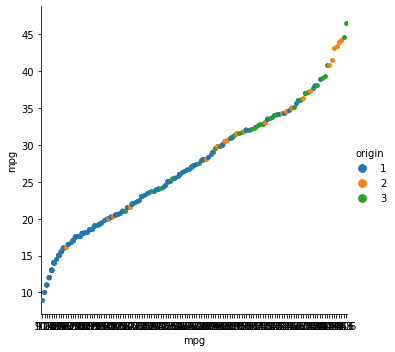

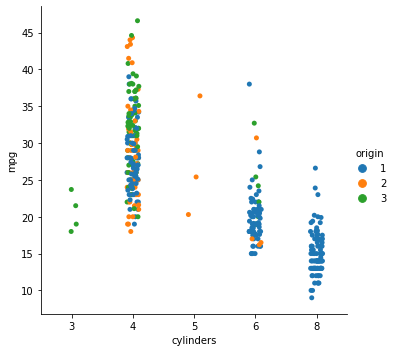

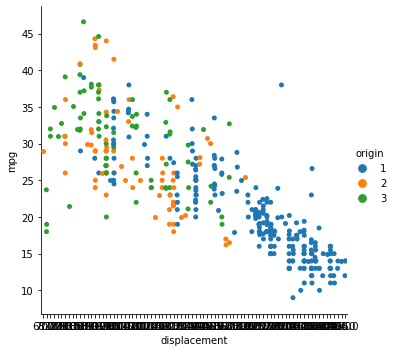

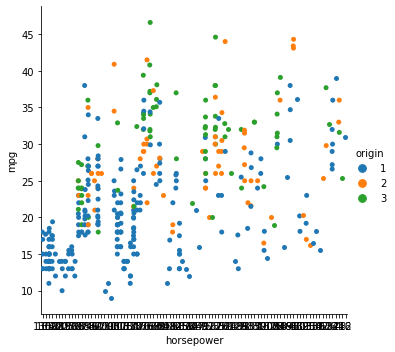

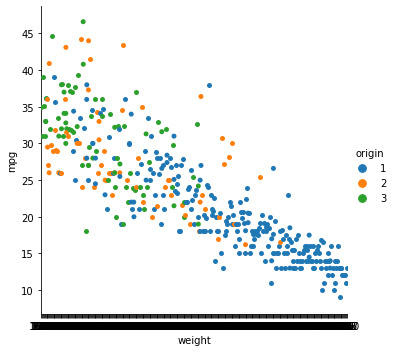

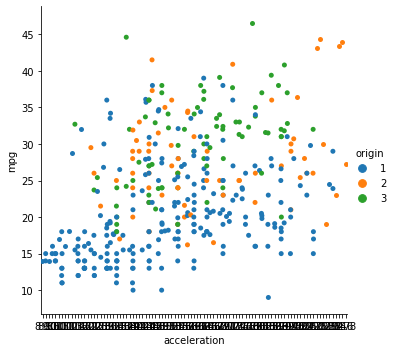

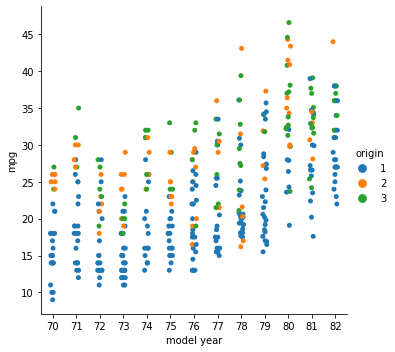

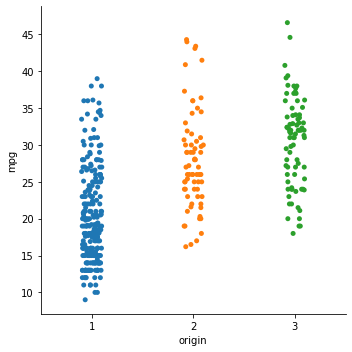

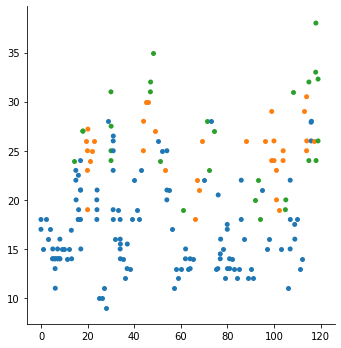

In [50]:
for i in df:
    sns.catplot(x=i, y='mpg',hue='origin',data=df)

 I interrupted the kernel for above plot as its taking toom much time.( almost 30 min waited)

# preprocessing  the data

In [53]:
# importing library to encode string varibles into integers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['horsepower']=le.fit_transform(df['horsepower'])
df['car name']=le.fit_transform(df['car name'])

In [54]:
# Checking the data type

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int32
dtype: object

In [55]:
df.shape

(398, 9)

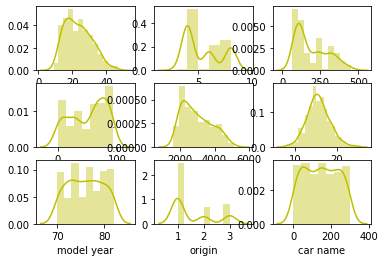

In [62]:
# Checking the distribution of data

fig, axes = plt.subplots(nrows=3, ncols=3)

for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3],color='y')

In [60]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower     -0.316618
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
car name        0.018665
dtype: float64

In [63]:
# Lets divide the data in to  input and target variables

x=df.drop(["mpg"],axis=1)

y=df["mpg"]


In [64]:
# normalizing the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Importing Libraries for model selection

In [87]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(318, 8)
(318,)
(80, 8)
(80,)


In [89]:
# for finding best random state  as parameter

max_r_score=0
for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        y_pred = lr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print("Max r2 score corresponding to ",final_r_state," is",max_r_score)

r2_score corresponding to random state  42 is:  0.8491578754824534
r2_score corresponding to random state  43 is:  0.8228451706776597
r2_score corresponding to random state  44 is:  0.8302256646337782
r2_score corresponding to random state  45 is:  0.8106017076612296
r2_score corresponding to random state  46 is:  0.8414323691908808
r2_score corresponding to random state  47 is:  0.8124999869789741
r2_score corresponding to random state  48 is:  0.8053555471151441
r2_score corresponding to random state  49 is:  0.86068700692718
r2_score corresponding to random state  50 is:  0.8135886322708828
r2_score corresponding to random state  51 is:  0.8035158304861248
r2_score corresponding to random state  52 is:  0.7927625567961629
r2_score corresponding to random state  53 is:  0.8094673080061018
r2_score corresponding to random state  54 is:  0.729035506887707
r2_score corresponding to random state  55 is:  0.8538657752975328
r2_score corresponding to random state  56 is:  0.833091599938202

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=91)

In [91]:

LR=LinearRegression()
LS=Lasso(random_state=91)
RD=Ridge(random_state=91)
KNR=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=91)
RFR=RandomForestRegressor(random_state=91)
GBR=GradientBoostingRegressor(random_state=91)
ABR=AdaBoostRegressor(random_state=91)

In [92]:
models = []
models.append(('LinearRegression', LR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('KNeighborseRegressor',KNR))
models.append(('SVR', SV))
models.append(('DecisionTreeRegressor', DTR))
models.append(('RandomForestRegressor', RFR))
models.append(('GradientBoostingRegressor', GBR))
models.append(('AdaBoostRegressor',ABR))

In [99]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    r2_scr=r2_score(y_test,pred)
    print('R2_score = ',r2_scr)
    R2_score.append(r2_scr)
    
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root Mean Square Error = ",rmse)
    RMSE.append(rmse) 
    
    
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n\n')

    

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.8709933415681019
Mean_Squared_Error = 7.191169581899475
Root Mean Square Error =  2.6816356169135798
Cross_Val_Score =  0.6414673426731421



********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=91,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.85685772431594
Mean_Squared_Error = 7.979125971443369
Root Mean Square Error =  2.8247346727512954
Cross_Val_Score =  0.5741388160939392



********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=91, solver='auto', tol=0.001)
R2_score =  0.8726399669169876
Mean_Squared_E

In [100]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Root Mean Square Error': RMSE, 'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Root Mean Square Error,Cross_val_score
0,LinearRegression,0.870993,7.191170,2.681636,0.641467
1,Lasso,0.856858,7.979126,2.824735,0.574139
2,Ridge,0.872640,7.099382,2.664467,0.641179
3,KNeighborseRegressor,0.862771,7.649530,2.765778,0.694383
4,SVR,0.888596,6.209972,2.491982,0.654813
5,DecisionTreeRegressor,0.779173,12.309500,3.508490,0.572148
6,RandomForestRegressor,0.931787,3.802357,1.949963,0.728931
7,GradientBoostingRegressor,0.928129,4.006282,2.001570,0.739011
8,AdaBoostRegressor,0.920971,4.405281,2.098876,0.713639


From here we can select Random Forest regressor as our final model s it has highest r2_scor with less mean errors and a better cross value score then others.

In [101]:
# we can further try Adaboost Regressor with base estimator Random forest regressor to check any more omprovement in our model

ABR=AdaBoostRegressor(base_estimator=RFR,random_state=91)
ABR.fit(x_train,y_train)
pred=ABR.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',ABR.score(x_train,y_train))
score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
print('Cross_Val_Score = ',score)

MAE =  1.3558499999999993
MSE =  3.026082124999999
RMSE =  1.7395637743411418
R2_score =  0.9457133170563291
Training_score =  0.9920756799881442
Cross_Val_Score =  0.7136385110365632


In [104]:
# From it is clear that AdaBoost regressor is slighty better then RandomForestRegressor which we selected earliear.

# but now we select AdaBoostRegressor as our final model.

# for saving our model

from sklearn.externals import joblib
joblib.dump(ABR,"auto-mpg.obj")

['auto-mpg.obj']

In [107]:
# testing our model

model=joblib.load("auto-mpg.obj")
model.predict(x_test)

array([29.391, 29.493, 15.443, 31.338, 34.654, 14.225, 14.64 , 24.156,
       26.331, 12.66 , 27.863, 33.379, 17.158, 28.55 , 13.169, 33.689,
       35.989, 24.345, 27.273, 19.524, 24.679, 17.046, 19.753, 22.   ,
       36.15 , 33.54 , 27.411, 27.187, 25.089, 20.538, 19.45 , 37.144,
       35.387, 17.213, 17.049, 26.303, 20.38 , 12.415, 17.862, 20.702,
       16.102, 24.045, 16.778, 17.216, 20.496, 24.978, 14.1  , 21.115,
       14.26 , 14.314, 16.27 , 34.464, 23.74 , 33.733, 32.11 , 25.246,
       16.245, 25.745, 16.49 , 14.271, 26.398, 13.85 , 24.253, 30.254,
       19.732, 29.918, 28.838, 25.786, 30.337, 19.632, 28.451, 30.906,
       13.111, 15.411, 20.304, 19.37 , 22.934, 14.964, 17.261, 21.358])

# Complete